In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

### Data understanding, preparation and EDA

In [2]:
##Reading data
carData = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
##exploring data
carData.shape

(205, 26)

In [4]:
##No Null values
carData.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
##Extracting company name
carData['company'] = carData['CarName'].apply(lambda x: x.split(' ')[0])

In [6]:
carData['company']  = carData['company'].str.lower()

In [7]:
def correctNames(name):
    if name=='maxda' or name=='mazda':
        return 'mazda'
    elif name=='porsche' or name=='porcshce':
        return 'porsche'
    elif name=='toyota' or name=='toyouta':
        return 'toyota'
    elif name=='vokswagen' or name=='volkswagen' or name=='vw':
        return 'volkswagen'
    else:
        return name
carData['company'] = carData['company'].apply(correctNames)

In [8]:
##dropping redundant carName
carData.drop('CarName',axis=1,inplace=True)

In [9]:
carData.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero


In [10]:
##dropping column with no significance 
carData.drop('car_ID',axis=1,inplace=True)

In [11]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [12]:
## Mean/median are close.. except price/horsepower.. dist to be checked
carData.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
##bucketing prices range 
carData['pricebucket'] = pd.cut(carData.price,bins=[0,5000,10000,15000,20000,25000,50000],labels=['upto 5k','5k-10k','10-15K','15-20k','20-25k','25-50k'])

In [14]:
##new column
carData['carArea'] = carData['carlength']*carData['carwidth']

In [15]:
##checking correlation - used to observe columns with high depedent variable co-relation, less co-relation with price
carData.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carArea
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.332196
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.885248
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.982352
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,0.926475
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.440987
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,0.906811
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,0.729031
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,0.607996
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,0.151343
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.172784


In [16]:
##CitiMpg and highwaympg high correlation.. take ratio
carData['mpgratio'] = carData['citympg'] / carData['highwaympg']

In [17]:
##engine size and curbweight high correlation.. take ratio
carData['engineweightratio'] = carData['enginesize'] / carData['curbweight']

In [18]:
##less correlation with price
carData.drop('symboling',axis=1,inplace=True)
##similar to wheelbase
carData.drop('carArea',axis=1,inplace=True)
carData.drop('carlength',axis=1,inplace=True)
carData.drop('carwidth',axis=1,inplace=True)
##less correlation with price
carData.drop('carheight',axis=1,inplace=True)
##engineweightratio added 
carData.drop('enginesize',axis=1,inplace=True)
carData.drop('curbweight',axis=1,inplace=True)
##mpgratio added
carData.drop('citympg',axis=1,inplace=True)
carData.drop('highwaympg',axis=1,inplace=True)

In [19]:
##seems loose correlation now between independent variables
carData.corr()

,wheelbase,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpgratio,engineweightratio
wheelbase,1.000000,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,0.066804,0.138852
boreratio,0.488750,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.248911,0.345848
stroke,0.160959,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.003916,0.189085
compressionratio,0.249786,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.067984,0.372331,-0.110204
horsepower,0.353294,0.573677,0.080940,-0.204326,1.000000,0.131073,0.808139,-0.520007,0.596720
peakrpm,-0.360469,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.085267,-0.306579,-0.162360
price,0.577816,0.553173,0.079443,0.067984,0.808139,-0.085267,1.000000,-0.298838,0.595635
mpgratio,0.066804,-0.248911,-0.003916,0.372331,-0.520007,-0.306579,-0.298838,1.000000,-0.190055
engineweightratio,0.138852,0.345848,0.189085,-0.110204,0.596720,-0.162360,0.595635,-0.190055,1.000000


**Seeing linear relationships so Linear regression would be good choice**

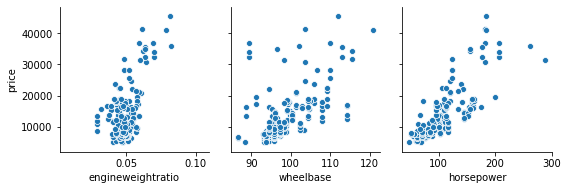

In [20]:
##seeing linear relationships for few variables so Linear regression would be option
sns.pairplot(y_vars='price',x_vars=['engineweightratio','wheelbase','horsepower'], data=carData)

**Outlier check**

In [21]:
carData.describe()

,wheelbase,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpgratio,engineweightratio
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,3.329756,3.255415,10.142537,104.117073,5125.121951,13276.710571,0.815670,0.049056
std,6.021776,0.270844,0.313597,3.972040,39.544167,476.985643,7988.852332,0.058449,0.007578
min,86.600000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,0.607143,0.029350
25%,94.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000,0.791667,0.045283
50%,97.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10295.000000,0.812500,0.047925
75%,102.400000,3.580000,3.410000,9.400000,116.000000,5500.000000,16503.000000,0.843750,0.051183
max,120.900000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000,1.000000,0.082532


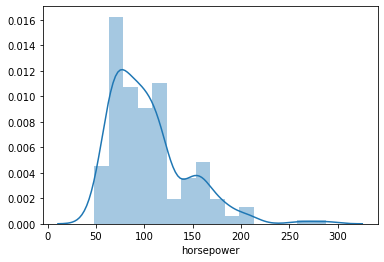

In [22]:
##horsepower has long right tail indicate outliers
sns.distplot(carData.horsepower)

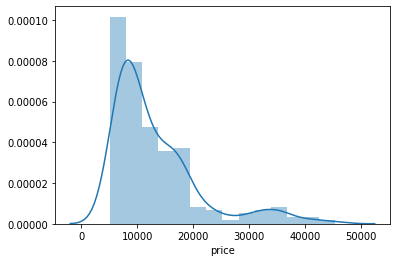

In [23]:
##price has long right tail indicate outliers
sns.distplot(carData.price)

In [24]:
##keeping data till 3 std deviation away
carData = carData[(np.abs(carData.price-carData.price.mean()) <= (3*carData.price.std()))]

In [25]:
##keeping data till 3 std deviation
carData = carData[(np.abs(carData.horsepower-carData.horsepower.mean()) <= (3*carData.horsepower.std()))]

**Check cargorical variables**
    - Check price spread across type of categorical variable
    - Check number of each type within one category feature. Should have enough samples for more than 1 types to make comparative inference.
    - Check distribution of each type within any category feature against price buckets to check any localization

(array([67., 47., 26., 27., 13.,  6.,  2.,  2.,  4.,  6.]),
 array([ 5118.,  8309., 11500., 14691., 17882., 21073., 24264., 27455.,
        30646., 33837., 37028.]),
 <a list of 10 Patch objects>)

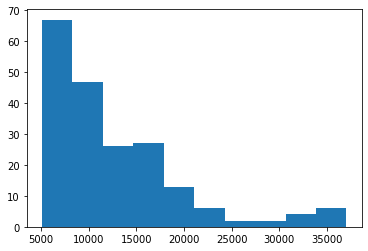

In [26]:
##most cars in dataset in 5k-20k range
plt.hist(carData.price)

In [27]:
carData.price.describe()

count      200.000000
mean     12633.250835
std       6912.080946
min       5118.000000
25%       7775.000000
50%      10096.500000
75%      16106.000000
max      37028.000000
Name: price, dtype: float64

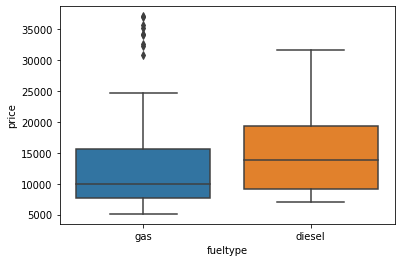

In [28]:
## analyze categorical data
##Diesel cars more expensive
sns.boxplot(x='fueltype',y='price',data=carData)

In [29]:
## Gas cars more popular
carData['fueltype'].value_counts()

gas       180
diesel     20
Name: fueltype, dtype: int64

In [30]:
carData[carData.fueltype=='diesel']['pricebucket'].value_counts()

5k-10k     6
10-15K     5
25-50k     4
15-20k     4
20-25k     1
upto 5k    0
Name: pricebucket, dtype: int64

In [31]:
carData[carData.fueltype=='gas']['pricebucket'].value_counts()

5k-10k     94
10-15K     36
15-20k     34
25-50k      9
20-25k      7
upto 5k     0
Name: pricebucket, dtype: int64

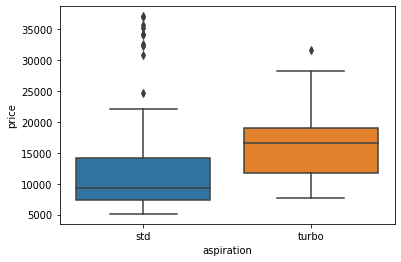

In [32]:
## analyze categorical data
##turbo cars more expensive

sns.boxplot(x='aspiration',y='price',data=carData)

In [33]:
## standard aspiration cars more popular
carData['aspiration'].value_counts()

std      163
turbo     37
Name: aspiration, dtype: int64

In [34]:
carData[carData.aspiration=='turbo']['pricebucket'].value_counts()

15-20k     12
10-15K     11
5k-10k      7
25-50k      4
20-25k      3
upto 5k     0
Name: pricebucket, dtype: int64

In [35]:
carData[carData.aspiration=='std']['pricebucket'].value_counts()

5k-10k     93
10-15K     30
15-20k     26
25-50k      9
20-25k      5
upto 5k     0
Name: pricebucket, dtype: int64

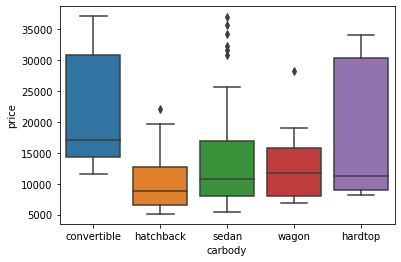

In [36]:
##Analyze categorical data
##hardtop/convertible cars more expensive

sns.boxplot(x='carbody',y='price',data=carData)

In [37]:
pd.pivot_table(data=carData,index='carbody',columns='pricebucket',values="price", aggfunc=len)

pricebucket,5k-10k,10-15K,15-20k,20-25k,25-50k
carbody,,,,,
convertible,NaN,2.0,2.0,NaN,2.0
hardtop,3.0,1.0,NaN,NaN,3.0
hatchback,43.0,14.0,11.0,1.0,NaN
sedan,43.0,17.0,19.0,7.0,7.0
wagon,11.0,7.0,6.0,NaN,1.0


In [38]:
##sedan/hatchback seems low price and popular and can be useful column for inference
carData['carbody'].value_counts()

sedan          93
hatchback      69
wagon          25
hardtop         7
convertible     6
Name: carbody, dtype: int64

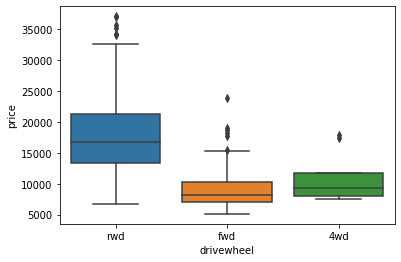

In [39]:
##Analyze categorical data
##rwd drivewheel cars more expensive
sns.boxplot(x='drivewheel',y='price',data=carData)

In [40]:
##count is large for category impacting price so useful variable for analysis
carData['drivewheel'].value_counts()

fwd    120
rwd     71
4wd      9
Name: drivewheel, dtype: int64

In [41]:
pd.pivot_table(data=carData,index='drivewheel',columns='pricebucket',values="price", aggfunc=len)

pricebucket,5k-10k,10-15K,15-20k,20-25k,25-50k
drivewheel,,,,,
4wd,5.0,2.0,2.0,NaN,NaN
fwd,87.0,25.0,7.0,1.0,NaN
rwd,8.0,14.0,29.0,7.0,13.0


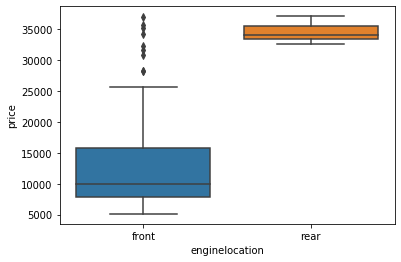

In [42]:
##Analyze categorical data
##rear engine cars more expensive.
sns.boxplot(x='enginelocation',y='price',data=carData)

In [43]:
##sample size too small for category impacting price heavily(rear) 
## Front engine is popular though
carData['enginelocation'].value_counts()

front    197
rear       3
Name: enginelocation, dtype: int64

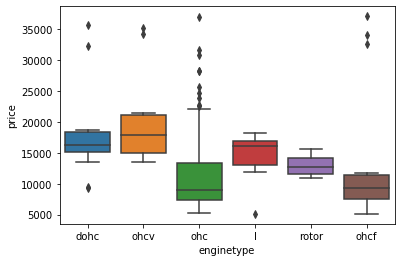

In [44]:
## analyze categorical data
sns.boxplot(x='enginetype',y='price',data=carData)

In [45]:

carData['enginetype'].value_counts()
pd.pivot_table(data=carData,index='enginetype',columns='pricebucket',values="price", aggfunc=len)

pricebucket,5k-10k,10-15K,15-20k,20-25k,25-50k
enginetype,,,,,
dohc,2.0,1.0,7.0,NaN,2.0
l,1.0,4.0,7.0,NaN,NaN
ohc,88.0,27.0,19.0,7.0,6.0
ohcf,9.0,3.0,NaN,NaN,3.0
ohcv,NaN,3.0,4.0,1.0,2.0
rotor,NaN,3.0,1.0,NaN,NaN


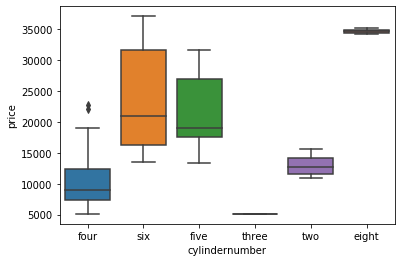

In [46]:
sns.boxplot(x='cylindernumber',y='price',data=carData)

In [47]:
carData['cylindernumber'].value_counts()

four     159
six       23
five      11
two        4
eight      2
three      1
Name: cylindernumber, dtype: int64

In [48]:
##four cylinder more popular
pd.pivot_table(data=carData,index='cylindernumber',columns='pricebucket',values="price", aggfunc=len)

pricebucket,5k-10k,10-15K,15-20k,20-25k,25-50k
cylindernumber,,,,,
eight,NaN,NaN,NaN,NaN,2.0
five,NaN,1.0,5.0,1.0,4.0
four,99.0,34.0,24.0,2.0,NaN
six,NaN,3.0,8.0,5.0,7.0
three,1.0,NaN,NaN,NaN,NaN
two,NaN,3.0,1.0,NaN,NaN


In [49]:
##fuelsystem mpfi showing strong trend 
pd.pivot_table(data=carData,index='fuelsystem',columns='pricebucket',values="price", aggfunc=len)

pricebucket,5k-10k,10-15K,15-20k,20-25k,25-50k
fuelsystem,,,,,
1bbl,10.0,1.0,NaN,NaN,NaN
2bbl,62.0,4.0,NaN,NaN,NaN
4bbl,NaN,3.0,NaN,NaN,NaN
idi,6.0,5.0,4.0,1.0,4.0
mfi,NaN,1.0,NaN,NaN,NaN
mpfi,17.0,22.0,34.0,7.0,9.0
spdi,5.0,4.0,NaN,NaN,NaN
spfi,NaN,1.0,NaN,NaN,NaN


In [50]:
carData['fuelsystem'].value_counts()

mpfi    89
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

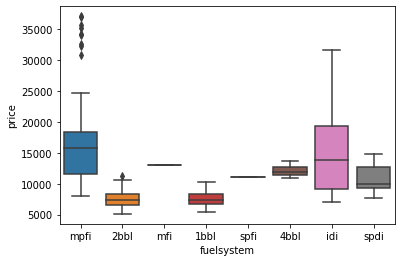

In [51]:
sns.boxplot(x='fuelsystem',y='price',data=carData)

In [52]:
##expensive brands.. 
carData.groupby(by='company')['price'].median().sort_values(ascending=False)

company
jaguar         33900.0
porsche        33278.0
buick          29924.0
bmw            21105.0
volvo          18420.0
audi           17710.0
peugeot        16630.0
mercury        16503.0
alfa-romero    16500.0
saab           15275.0
mazda          10595.0
volkswagen      9737.5
renault         9595.0
toyota          9103.0
isuzu           8916.5
mitsubishi      8499.0
nissan          8124.0
subaru          7894.0
plymouth        7609.0
dodge           7609.0
honda           7295.0
chevrolet       6295.0
Name: price, dtype: float64

In [53]:
##categorize brand
def brandcat(cmp):
    if cmp == 'jaguar' or cmp == 'buick' or cmp == 'porsche' or cmp == 'bmw':
        return 'top'
    elif cmp == 'volvo' or cmp == 'audi' or cmp == 'peugeot' or cmp == 'alfa-romero' or cmp == 'saab':
        return 'medium'
    else:
        return 'low'
carData['companycat'] = carData['company'].apply(brandcat)

## Dealing with categorical Variables

In [54]:
carData.shape

(200, 21)

In [55]:
## Drop variables created for EDA
carData.drop(['pricebucket','company'],axis=1,inplace=True)

In [56]:
##making cat vars ready for linear regresssion
carData = pd.get_dummies(carData,drop_first=True)

In [57]:
carData.shape

(200, 38)

In [58]:
carData.columns

Index(['wheelbase', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'mpgratio', 'engineweightratio', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'companycat_medium', 'companycat_top'],
      dtype='object')

In [59]:
carData.head(2)

,wheelbase,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpgratio,engineweightratio,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,companycat_medium,companycat_top
0,88.6,3.47,2.68,9.0,111,5000,13495.0,0.777778,0.05102,1,...,0,0,0,0,0,1,0,0,1,0
1,88.6,3.47,2.68,9.0,111,5000,16500.0,0.777778,0.05102,1,...,0,0,0,0,0,1,0,0,1,0


## Split train/test data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
np.random.seed(0)
train_df,test_df = train_test_split(carData,train_size=0.7,random_state=100)

In [62]:
train_df.shape

(140, 38)

In [63]:
test_df.shape

(60, 38)

In [64]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wheelbase             200 non-null    float64
 1   boreratio             200 non-null    float64
 2   stroke                200 non-null    float64
 3   compressionratio      200 non-null    float64
 4   horsepower            200 non-null    int64  
 5   peakrpm               200 non-null    int64  
 6   price                 200 non-null    float64
 7   mpgratio              200 non-null    float64
 8   engineweightratio     200 non-null    float64
 9   fueltype_gas          200 non-null    uint8  
 10  aspiration_turbo      200 non-null    uint8  
 11  doornumber_two        200 non-null    uint8  
 12  carbody_hardtop       200 non-null    uint8  
 13  carbody_hatchback     200 non-null    uint8  
 14  carbody_sedan         200 non-null    uint8  
 15  carbody_wagon         2

## Scaling 

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scalar= MinMaxScaler()

In [67]:
train_df[train_df.columns] = scalar.fit_transform(train_df[train_df.columns])

In [68]:
train_df.head(3)

,wheelbase,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpgratio,engineweightratio,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,companycat_medium,companycat_top
78,0.244828,0.307143,0.552381,0.15000,0.125786,0.55102,0.047843,0.424342,0.403445,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.455172,0.464286,0.633333,0.18750,0.339623,0.55102,0.277317,0.375000,0.421300,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
190,0.272414,0.464286,0.633333,0.09375,0.264151,0.55102,0.152195,0.461207,0.480654,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Model feature selection and training

In [69]:
y_train = train_df.pop('price')
X_train = train_df

In [70]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('boreratio', False, 21),
 ('stroke', False, 20),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', False, 19),
 ('mpgratio', False, 12),
 ('engineweightratio', False, 25),
 ('fueltype_gas', False, 6),
 ('aspiration_turbo', False, 13),
 ('doornumber_two', False, 18),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 14),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 22),
 ('enginetype_ohcf', False, 26),
 ('enginetype_ohcv', False, 16),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_two', False, 5),
 ('fuelsystem_2bbl', False, 27),
 ('fuelsystem_4bbl', False, 17),
 ('fuelsystem_idi', False, 11),
 ('fuelsystem_mfi', False, 

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'horsepower', 'carbody_wagon', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'companycat_top'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['boreratio', 'stroke', 'compressionratio', 'peakrpm', 'mpgratio',
       'engineweightratio', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'companycat_medium'],
      dtype='object')

In [75]:
import statsmodels.api as sm

In [76]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)

In [77]:
ml = sm.OLS(y_train,X_train_sm).fit()

In [78]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.78e-67
Time:                        16:48:43   Log-Likelihood:                 202.90
No. Observations:                 140   AIC:                            -383.8
Df Residuals:                     129   BIC:                            -351.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2955      0.066      4.445      0.000       0.164       0.427
wheelbase                0.3703      0.032     11.614      0.000       0.307       0.433
horsepower               0.4083      0.034     12.147      0.000       0.342       0.475
carbody_wagon           -0.0420      0.015     -2.797      0.006      -0.072      -0.012
enginelocation_rear      0.2026      0.067      3.023      0.003       0.070       0.335
enginetype_rotor        -0.3165      0.071     -4.485      0.000      -0.456      -0.177
cylindernumber_five     -0.2839      0.066     -4.313      0.000      -0.414      -0.154
cylindernumber_four     -0.3830      0.065     -5.877      0.000      -0.512      -0.254
cylindernumber_six      -0.3251      0.064     -5.113      0.000      -0.451      -0.199
cylindernumber_three    -0.3185      0.089     -3.577      0.000      -0.495      -0.142
companycat_top           0.2445      0.023     10.739      0.000       0.199       0.290
==============================================================================
Omnibus:                        5.682   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.322
Skew:                           0.384   Prob(JB):                       0.0699
Kurtosis:                       3.568   Cond. No.                         44.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,8.30
1,horsepower,6.12
6,cylindernumber_four,5.61
7,cylindernumber_six,3.10
5,cylindernumber_five,2.04
9,companycat_top,1.60
2,carbody_wagon,1.35
3,enginelocation_rear,1.26
4,enginetype_rotor,1.20
8,cylindernumber_three,1.00


In [81]:
## check which feature has more correlation with wheelbase
X_train_rfe.corr()


,wheelbase,horsepower,carbody_wagon,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,companycat_top
wheelbase,1.000000,0.336564,0.270027,-0.132483,-0.093360,0.293155,-0.242538,0.187420,-0.148852,0.278287
horsepower,0.336564,1.000000,-0.079282,0.273687,0.050943,0.190310,-0.561028,0.563321,-0.131546,0.383827
carbody_wagon,0.270027,-0.079282,1.000000,-0.035631,-0.072044,-0.028547,0.073127,-0.016169,-0.035631,-0.057166
enginelocation_rear,-0.132483,0.273687,-0.035631,1.000000,-0.014546,-0.022232,-0.162416,0.244851,-0.007194,0.277017
enginetype_rotor,-0.093360,0.050943,-0.072044,-0.014546,1.000000,-0.044952,-0.328395,-0.059409,-0.014546,-0.052511
cylindernumber_five,0.293155,0.190310,-0.028547,-0.022232,-0.044952,1.000000,-0.501905,-0.090798,-0.022232,0.231847
cylindernumber_four,-0.242538,-0.561028,0.073127,-0.162416,-0.328395,-0.501905,1.000000,-0.663325,-0.162416,-0.461935
cylindernumber_six,0.187420,0.563321,-0.016169,0.244851,-0.059409,-0.090798,-0.663325,1.000000,-0.029382,0.388909
cylindernumber_three,-0.148852,-0.131546,-0.035631,-0.007194,-0.014546,-0.022232,-0.162416,-0.029382,1.000000,-0.025970
companycat_top,0.278287,0.383827,-0.057166,0.277017,-0.052511,0.231847,-0.461935,0.388909,-0.025970,1.000000


In [82]:
##choosing cylindernumber_five which is less popular and have descent correlation with wheelbase
X_train_rfe = X_train_rfe.drop('cylindernumber_five',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.23e-64
Time:                        16:48:44   Log-Likelihood:                 193.48
No. Observations:                 140   AIC:                            -367.0
Df Residuals:                     130   BIC:                            -337.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0363      0.030      1.199      0.233      -0.024       0.096
wheelbase                0.3411      0.033     10.275      0.000       0.275       0.407
horsepower               0.4292      0.035     12.108      0.000       0.359       0.499
carbody_wagon           -0.0380      0.016     -2.378      0.019      -0.070      -0.006
enginelocation_rear      0.1661      0.071      2.345      0.021       0.026       0.306
enginetype_rotor        -0.0567      0.039     -1.448      0.150      -0.134       0.021
cylindernumber_four     -0.1193      0.024     -4.967      0.000      -0.167      -0.072
cylindernumber_six      -0.0733      0.027     -2.734      0.007      -0.126      -0.020
cylindernumber_three    -0.0575      0.070     -0.826      0.410      -0.195       0.080
companycat_top           0.2704      0.023     11.554      0.000       0.224       0.317
==============================================================================
Omnibus:                       16.779   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.537
Skew:                           0.679   Prob(JB):                     1.28e-05
Kurtosis:                       4.421   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
##high p
X_train_rfe = X_train_rfe.drop('cylindernumber_three',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.28e-65
Time:                        16:48:44   Log-Likelihood:                 193.11
No. Observations:                 140   AIC:                            -368.2
Df Residuals:                     131   BIC:                            -341.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0257      0.027      0.939      0.349      -0.029       0.080
wheelbase               0.3453      0.033     10.539      0.000       0.281       0.410
horsepower              0.4346      0.035     12.494      0.000       0.366       0.503
carbody_wagon          -0.0381      0.016     -2.391      0.018      -0.070      -0.007
enginelocation_rear     0.1649      0.071      2.332      0.021       0.025       0.305
enginetype_rotor       -0.0495      0.038     -1.298      0.197      -0.125       0.026
cylindernumber_four    -0.1118      0.022     -5.037      0.000      -0.156      -0.068
cylindernumber_six     -0.0691      0.026     -2.627      0.010      -0.121      -0.017
companycat_top          0.2721      0.023     11.682      0.000       0.226       0.318
==============================================================================
Omnibus:                       17.029   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.165
Skew:                           0.682   Prob(JB):                     9.33e-06
Kurtosis:                       4.453   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,6.52
1,horsepower,5.50
5,cylindernumber_four,3.52
6,cylindernumber_six,2.17
7,companycat_top,1.60
2,carbody_wagon,1.34
3,enginelocation_rear,1.26
4,enginetype_rotor,1.12


In [85]:
##check which feature has correlation with wheelbase.. Need to reduce rfe and wheelbase is imp bz feature
X_train_new.corr()

,wheelbase,horsepower,carbody_wagon,enginelocation_rear,enginetype_rotor,cylindernumber_four,cylindernumber_six,companycat_top
wheelbase,1.000000,0.336564,0.270027,-0.132483,-0.093360,-0.242538,0.187420,0.278287
horsepower,0.336564,1.000000,-0.079282,0.273687,0.050943,-0.561028,0.563321,0.383827
carbody_wagon,0.270027,-0.079282,1.000000,-0.035631,-0.072044,0.073127,-0.016169,-0.057166
enginelocation_rear,-0.132483,0.273687,-0.035631,1.000000,-0.014546,-0.162416,0.244851,0.277017
enginetype_rotor,-0.093360,0.050943,-0.072044,-0.014546,1.000000,-0.328395,-0.059409,-0.052511
cylindernumber_four,-0.242538,-0.561028,0.073127,-0.162416,-0.328395,1.000000,-0.663325,-0.461935
cylindernumber_six,0.187420,0.563321,-0.016169,0.244851,-0.059409,-0.663325,1.000000,0.388909
companycat_top,0.278287,0.383827,-0.057166,0.277017,-0.052511,-0.461935,0.388909,1.000000


In [86]:
##high p value and small co-efficient and only 4 samples per EDA
X_train_rfe = X_train_rfe.drop('enginetype_rotor',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.02e-66
Time:                        16:48:44   Log-Likelihood:                 192.22
No. Observations:                 140   AIC:                            -368.4
Df Residuals:                     132   BIC:                            -344.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0084      0.024      0.351      0.726      -0.039       0.056
wheelbase               0.3512      0.033     10.791      0.000       0.287       0.416
horsepower              0.4343      0.035     12.453      0.000       0.365       0.503
carbody_wagon          -0.0382      0.016     -2.389      0.018      -0.070      -0.007
enginelocation_rear     0.1641      0.071      2.315      0.022       0.024       0.304
cylindernumber_four    -0.0967      0.019     -5.101      0.000      -0.134      -0.059
cylindernumber_six     -0.0566      0.025     -2.307      0.023      -0.105      -0.008
companycat_top          0.2775      0.023     12.081      0.000       0.232       0.323
==============================================================================
Omnibus:                       18.840   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.488
Skew:                           0.713   Prob(JB):                     1.07e-06
Kurtosis:                       4.637   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,6.49
1,horsepower,5.21
4,cylindernumber_four,3.32
5,cylindernumber_six,2.08
6,companycat_top,1.58
2,carbody_wagon,1.34
3,enginelocation_rear,1.26


In [88]:
##more correlation with wheelbase/horsepower.. low co-eff
X_train_rfe = X_train_rfe.drop('carbody_wagon',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.12e-66
Time:                        16:48:44   Log-Likelihood:                 189.25
No. Observations:                 140   AIC:                            -364.5
Df Residuals:                     133   BIC:                            -343.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0116      0.024      0.474      0.636      -0.037       0.060
wheelbase               0.3247      0.031     10.429      0.000       0.263       0.386
horsepower              0.4473      0.035     12.761      0.000       0.378       0.517
enginelocation_rear     0.1497      0.072      2.082      0.039       0.007       0.292
cylindernumber_four    -0.0995      0.019     -5.168      0.000      -0.138      -0.061
cylindernumber_six     -0.0612      0.025     -2.456      0.015      -0.110      -0.012
companycat_top          0.2830      0.023     12.168      0.000       0.237       0.329
==============================================================================
Omnibus:                       18.529   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.893
Skew:                           0.704   Prob(JB):                     1.45e-06
Kurtosis:                       4.621   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,5.71
1,horsepower,5.00
3,cylindernumber_four,3.32
4,cylindernumber_six,2.07
5,companycat_top,1.56
2,enginelocation_rear,1.25


In [90]:
##more correlation with wheelbase/horsepower
X_train_rfe = X_train_rfe.drop('cylindernumber_six',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     252.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.39e-66
Time:                        16:48:44   Log-Likelihood:                 186.15
No. Observations:                 140   AIC:                            -360.3
Df Residuals:                     134   BIC:                            -342.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0056      0.024     -0.236      0.814      -0.053       0.041
wheelbase               0.3266      0.032     10.303      0.000       0.264       0.389
horsepower              0.4243      0.034     12.332      0.000       0.356       0.492
enginelocation_rear     0.1318      0.073      1.809      0.073      -0.012       0.276
cylindernumber_four    -0.0769      0.017     -4.465      0.000      -0.111      -0.043
companycat_top          0.2797      0.024     11.827      0.000       0.233       0.326
==============================================================================
Omnibus:                       20.935   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.738
Skew:                           0.628   Prob(JB):                     3.18e-10
Kurtosis:                       5.433   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,5.66
1,horsepower,3.95
3,cylindernumber_four,2.68
4,companycat_top,1.55
2,enginelocation_rear,1.24


In [92]:
##only 3 samples in data per EDA and high p
X_train_rfe = X_train_rfe.drop('enginelocation_rear',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     309.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.40e-67
Time:                        16:48:44   Log-Likelihood:                 184.46
No. Observations:                 140   AIC:                            -358.9
Df Residuals:                     135   BIC:                            -344.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0054      0.024     -0.223      0.824      -0.053       0.042
wheelbase               0.3100      0.031     10.133      0.000       0.249       0.370
horsepower              0.4404      0.034     13.140      0.000       0.374       0.507
cylindernumber_four    -0.0753      0.017     -4.338      0.000      -0.110      -0.041
companycat_top          0.2904      0.023     12.583      0.000       0.245       0.336
==============================================================================
Omnibus:                       15.981   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.698
Skew:                           0.521   Prob(JB):                     5.87e-07
Kurtosis:                       4.958   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
0,wheelbase,5.10
1,horsepower,3.55
2,cylindernumber_four,2.66
3,companycat_top,1.45


In [94]:
##coefficient is small for price
X_train_rfe = X_train_rfe.drop('cylindernumber_four',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
ml = sm.OLS(y_train,X_train_sm).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     359.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.05e-64
Time:                        16:48:44   Log-Likelihood:                 175.32
No. Observations:                 140   AIC:                            -342.6
Df Residuals:                     136   BIC:                            -330.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0894      0.015     -5.922      0.000      -0.119      -0.060
wheelbase          0.3119      0.033      9.589      0.000       0.248       0.376
horsepower         0.5063      0.032     15.936      0.000       0.443       0.569
companycat_top     0.3221      0.023     13.831      0.000       0.276       0.368
==============================================================================
Omnibus:                       14.454   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.438
Skew:                           0.547   Prob(JB):                     2.21e-05
Kurtosis:                       4.575   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['RFE']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['RFE'] = round(rfe['RFE'],2)
rfe.sort_values(by='RFE',ascending=False,inplace=True)
rfe

,features,RFE
1,horsepower,3.55
0,wheelbase,3.32
2,companycat_top,1.25


**Looks good model explaining imp bz factors, p<0.05, RFE < 5, Durbin-watson ratio around 2(Homoscedesticity), 
would like to improve on prob(Omnibus)/reduce skew/kurtosis.. Lets see plot in residual analysis**

## Residual analysis

In [96]:
y_train_pred = ml.predict(X_train_sm)

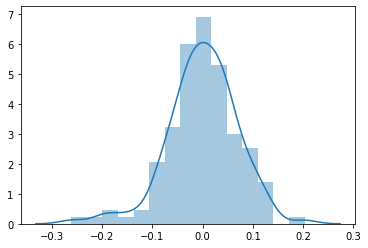

In [97]:
sns.distplot(y_train_pred-y_train)
## Errors almost normally distributed 

## Model Predictions

In [98]:
##scaling test data
test_df[test_df.columns] = scalar.transform(test_df[test_df.columns])


In [99]:
y_test = test_df.pop('price')
X_test = test_df
X_test_rfe = X_test[col]
X_test_rfe.drop(['cylindernumber_five','cylindernumber_three','enginetype_rotor','carbody_wagon','cylindernumber_six','enginelocation_rear','cylindernumber_four'],axis=1,inplace=True)
X_test_sm = sm.add_constant(X_test_rfe)
y_test_pred = ml.predict(X_test_sm)

## Model Evaluation

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [101]:
## R2 on test data
r2_score(y_test,y_test_pred)

0.8622128561987967

In [102]:
##RMSE on test data
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.08900139945032044

Text(0, 0.5, 'y_test_pred')

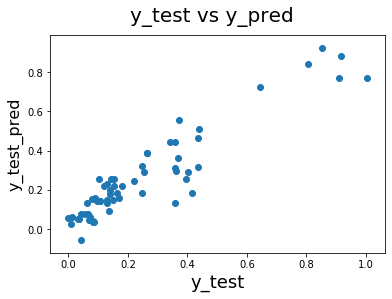

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

## Conclusion

- **R2 0.888 on train data** against **0.862 on test data**.
- **Adjusted R2 0.885** which is very close to 0.888 R2. VIF below 5 for all independent vars
- **RMSE is 0.089**
- **price** = **-** 0.0894 **+** 0.5063 * horsepower **+** 0.3119 * wheelbase **+** 0.3221 * top brand
- Common features of cars based on popularity 
    - fueltype - gas
    - aspiration - standard
    - carbody - sedan
    - drivewheel - forward
    - enginelocation - front
    - engine type - ohc
    - number of cylinders - 4
    - fuel system - mpfi
    - brand - jaguar
- Looks descent model explaining imp bz factors, p<0.05, RFE < 5, Durbin-watson ratio around 2(Homoscedesticity), 
    
